## Metodos Alterados
<br>

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

caminhos = ['Componentes', 'Classes', 'Servidor', 'Cliente']

In [1]:
def Grafico(df):
    Metodos = df.NOME.value_counts().to_frame() #index #.tolist()
    #Files[:20].plot(kind='barh')
    #Files = Files.filter(like='.pas', axis=0)

    Metodos[:20].plot(kind='barh')
    plt.title("Metodos mais alterados")
    plt.show()

In [2]:
def File(df):
    df = df.assign(file=df['ARQUIVO'].str.split("/"))
    files = []
    for row in df['ARQUIVO']:
        files.append(row.split('/')[-1])
    df['FILE'] = files
    df = df.drop('ARQUIVO', axis=1)
    return df

In [3]:
def Conta(df):
    Salts_counts = df.SALT.value_counts()
    df['conta'] = df.SALT.apply(lambda y: 1 if y not in Salts_counts else Salts_counts[y])

In [96]:
def HorasMetodo(df, ApenasCorrecao):
    dfSaltsMerge = pd.read_csv('csv\\SaltHorasDesenv.csv', encoding='ISO-8859-1', delimiter=',')
    #dfSaltsMerge = dfSaltsMerge.drop('PerdeuPrazoSla', axis=1)#.set_index('Salt')#.reset_index()
    dfSaltsMerge['SALT'] = dfSaltsMerge.Salt # = dfSaltsMerge.Salt.value_counts()
    df = df.merge(dfSaltsMerge, how='right', on='SALT')
    if ApenasCorrecao:
        df = df[df.alteracao == False]
    df['Media'] = df.HORASTOTAIS / df.conta
    #print (df.head(15))
    HorasFile = df.groupby('NOME', as_index=False).agg({"Media": "sum"})
    HorasFile = HorasFile.set_index('NOME').sort_values(by='Media', ascending=False)
    HorasFile.head(10)
    HorasFile[:20].plot(kind='barh')
    plt.title("Metodos e horas gastas")
    plt.show()

In [111]:
#Horas dos metodos com mais linhas

df = pd.read_csv('csv\\Servidor.csv', encoding='ISO-8859-1', delimiter=',')
#nomes = ['uspjPendenciaPrazo.ConsultaPendencia', 'uspjDBase.ConsultaAtualizacaoInformacoes', 'uspjPendenciaPrazo.AtualizePendencia', 'uspjDocEmitidoServ.OnDepoisSalvarDocumento', 'uspjCDA.OrganizarDadosGeracao', 'uspjProcessoServ.ConsultaProcessoPeloWS', 'uspjPedidoProcurServ.AtualizaPedidoProcurador', 'uspjConsPendenciaPrazoRPdevBasica.PassaParametro', 'uspjCadProcessoMovBase.ccCadastroSpAntesExecutar', 'uspjConsCDA.PreenchaParametrosConsulta', 'uspjIntimacaoEletServ.ProcessaIntimacao', 'uspjProcessoServ.VerificaConsistenciaProcesso', 'uspjIntimacaoEletServ.ImportarDadosRecebidosWS', 'uspjProcessoMvServ.IncluaMovimentacao']
#for nome in nomes:
#    df = df[~df.NOME.str.contains(nome)]
print (df.shape)
dfSaltsMerge = pd.read_csv('csv\\SaltHorasDesenv.csv', encoding='ISO-8859-1', delimiter=',')
#dfSaltsMerge = dfSaltsMerge.drop('PerdeuPrazoSla', axis=1)#.set_index('Salt')#.reset_index()
dfSaltsMerge['SALT'] = dfSaltsMerge.Salt # = dfSaltsMerge.Salt.value_counts()
df = df.merge(dfSaltsMerge, how='right', on='SALT')
#df = df[df.alteracao == False]
Salts_counts = df.SALT.value_counts()
df['conta'] = df.SALT.apply(lambda y: 1 if y not in Salts_counts else Salts_counts[y])

df['Media'] = df.HORASTOTAIS / df.conta
#print (df.head(15))
HorasFile = df.groupby('NOME', as_index=False).agg({"Media": "sum"})
HorasFile = HorasFile.set_index('NOME').sort_values(by='Media', ascending=False)
HorasFile.head(15)
#HorasFile[:20].plot(kind='barh')
#plt.title("Metodos e horas gastas")
#plt.show()

(11963, 5)


,Media
NOME,
function TspjDBaseBasica.ExecutaMetodoServidor(psNomeMetodo: string;,824.418064
function TspjDBaseBasica.espjEstPainelSAP: IspEntidade;,688.650000
procedure TespjDistProcessoServ.DistribuirProcesso(poAtualizacao: TspAtualizacao;,206.173217
function TespjWsServicoTJServ.ServicoAjuizamentoTJ(var pvDadosChamada: olevariant): WideString;,174.578819
function TespjPendenciaprazoServ.SelectManifestacao: IspSelect;,169.919386
procedure TespjDistdevedorServ.DistribuirDevedor(const pvDadosDist: olevariant;,168.041366
function TespjProcessoServ.ExecutaMetodoServidor(psNomeMetodo: string;,139.722252
function TespjPendenciaprazoServ.ExecutaMetodoServidor(psNomeMetodo: string;,138.980926
function TespjDocEmitidoServ.OnDepoisSalvarDocumento(var pcdsDocEmitido: olevariant;,130.193657


In [84]:
nomes = ['ExecutaMetodoServidor', 'TspjDBaseBasica', 'InicializaSpSelect', 'TfspjTelaMenu']
def RemoverMetodos(df):
    #df = df[~df['NOME'].isin(['ExecutaMetodoServidor', 'TspjDBaseBasica', 'InicializaSpSelect', 'TfspjTelaMenu'])]
    for nome in nomes:
        df = df[~df.NOME.str.contains(nome)]
    return df
    #return df[~df.NOME.str.contains('ExecutaMetodoServidor')]

In [85]:
df = pd.read_csv('csv\\Servidor.csv', encoding='ISO-8859-1', delimiter=',')
print (df.shape)
df = RemoverMetodos(df)
print (df.shape)
df.groupby(['NOME'])['SALT'].count().to_frame().sort_values(by='SALT', ascending=False)

(11963, 5)
(10364, 5)


,SALT
NOME,
function TespjDocEmitidoServ.OnDepoisSalvarDocumento(var pcdsDocEmitido: olevariant;,60
procedure TspjSelectFluxoObjetoBasico.AdicionarColunas;,51
function TespjPendenciaprazoServ.SelectManifestacao: IspSelect;,50
procedure TspjSelectFluxoObjetoBasico.AdicionarTabelas;,35
procedure TespjDistProcessoServ.DistribuirProcesso(poAtualizacao: TspAtualizacao;,34
procedure TspjSelectFluxoObjetoBasico.AdicionarJuncoes;,34
function TespjIntimacaoeletServ.ProcessaIntimacao(const psPacoteRecebido: WideString;,33
procedure TspjSelectFluxoPendencia.AdicionarColunas;,33
"function TespjPendenciaPrazoServ.ConsultaPendencia(psUsuario, psCategoria,",33


In [88]:
def Alteracoes(ApenasCorrecao):
    for caminho in caminhos:
        arquivo = 'csv\\' + caminho + '.csv'
        print (arquivo)
        if not os.path.isfile(arquivo):
            continue
        df = pd.read_csv(arquivo, encoding='ISO-8859-1', delimiter=',')
        print (df.shape)
        df = RemoverMetodos(df)
        Conta(df)
        HorasMetodo(df, ApenasCorrecao)
        print (df.shape)
        if df.shape[0] > 0:
            df = File(df)
            Grafico(df)
    df = []

csv\Componentes.csv
(7368, 5)


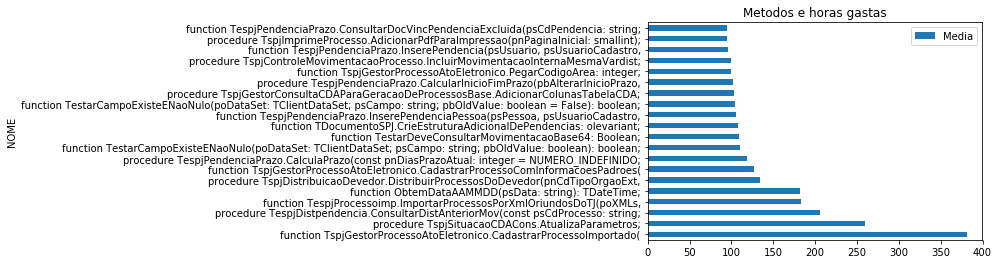

(7368, 6)


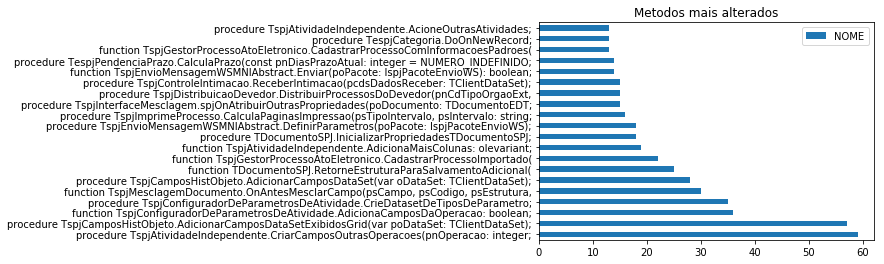

csv\Classes.csv
(240, 5)


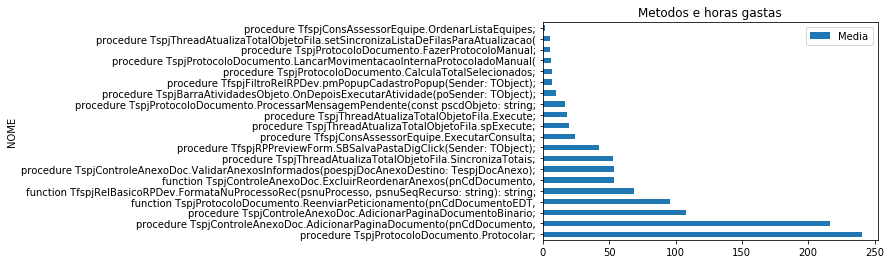

(240, 6)


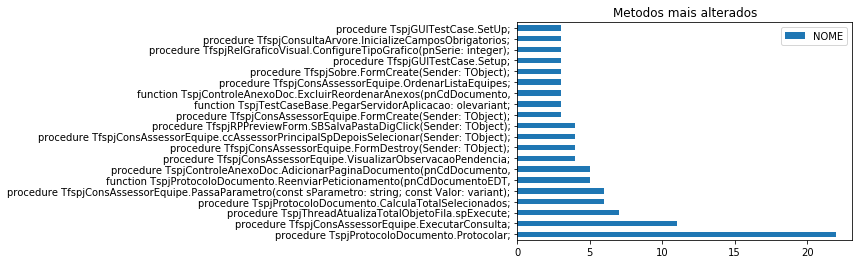

csv\Servidor.csv
(11963, 5)


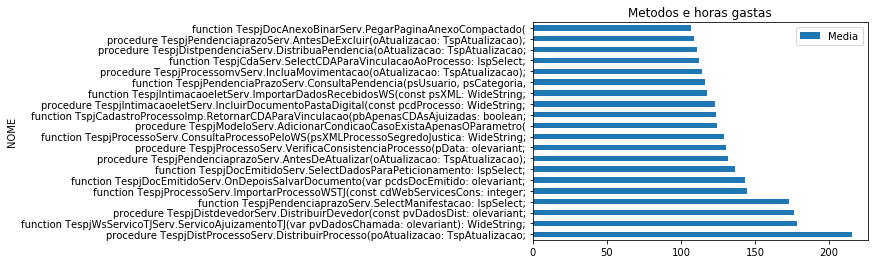

(10364, 6)


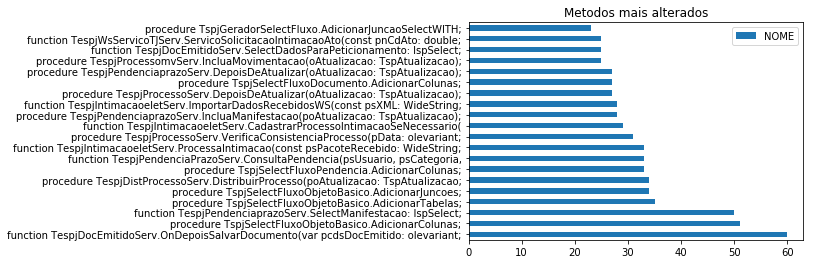

csv\Cliente.csv
(9531, 5)


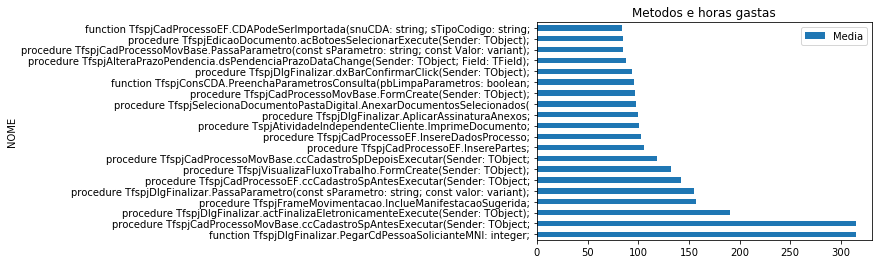

(9380, 6)


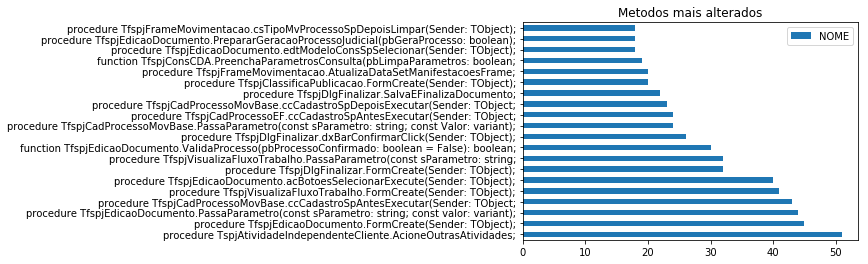

In [89]:
Alteracoes(False)

In [93]:
df = pd.read_csv('csv\\Cliente.csv', encoding='ISO-8859-1', delimiter=',')
#df[df.NOME == 'procedure TfspjRelBasicoRPDev.pbFirstClick;']['ARQUIVO'][327839][-30:]
df[df.NOME.str.contains('CdPessoa')]

,ARQUIVO,CHANGESET,DESENV,NOME,SALT
390,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,550418,olimar.santos,procedure TfspjConsInformacaoDevedorEndereco.M...,170146/1
1104,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,541471,rafael.db1,procedure TfspjCadPessoaCardList.InserirTiposD...,210916/8
4906,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,411399,cassio.roos,function TfspjDlgFinalizar.PegarCdPessoaSolici...,102595/1
5558,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,387072,wilian.ivo,function TfspjDlgFinalizar.PegarCdPessoaSolici...,194065/1
5567,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,386384,willian.reis,function TfspjDlgFinalizar.PegarCdPessoaSolici...,175134/4/114
5742,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,381790,willian.reis,function TfspjDlgFinalizar.PegarCdPessoaSolici...,175134/4
5745,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,381786,willian.reis,function TfspjDlgFinalizar.PegarCdPessoaSolici...,175134/4
7621,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,295299,willian.reis,function TfspjDlgFinalizar.PegarCdPessoaSolici...,175134/10
7727,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,276118,rafael.buss,function TfspjDlgFinalizar.PegarCdPessoaSolici...,174499/1
8094,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Cliente\...,257498,luhan.silva,procedure TfspjEdicaoDocumento.RecebeAutosCont...,166359/232


## Apenas correção

csv\Componentes.csv
(7368, 5)


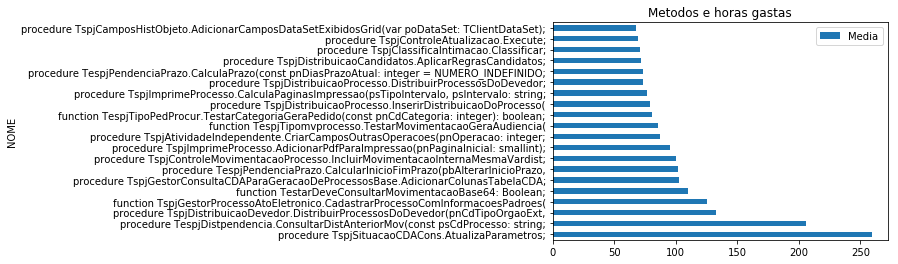

(7368, 6)


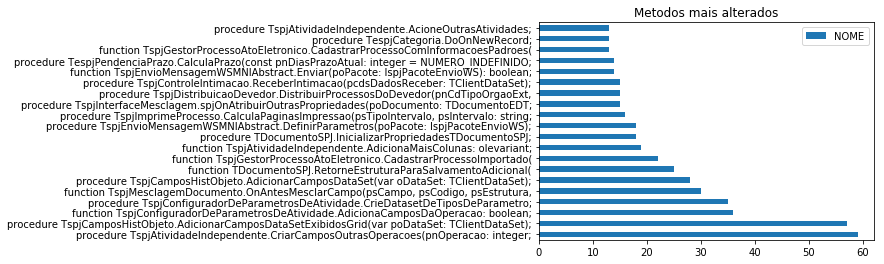

csv\Classes.csv
(240, 5)


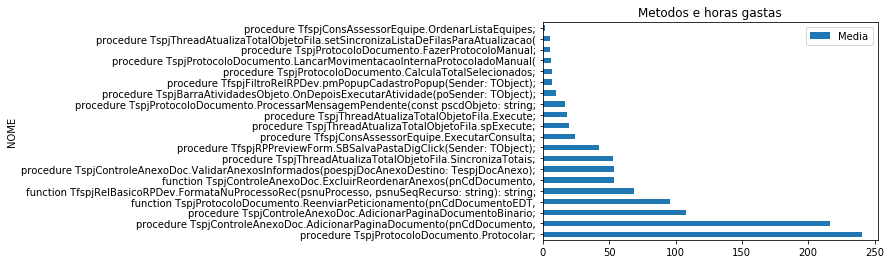

(240, 6)


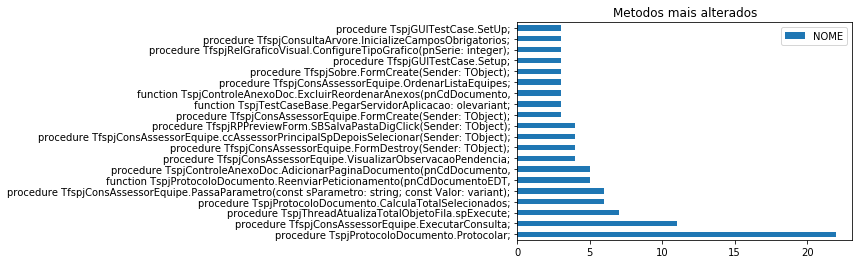

csv\Servidor.csv
(11963, 5)


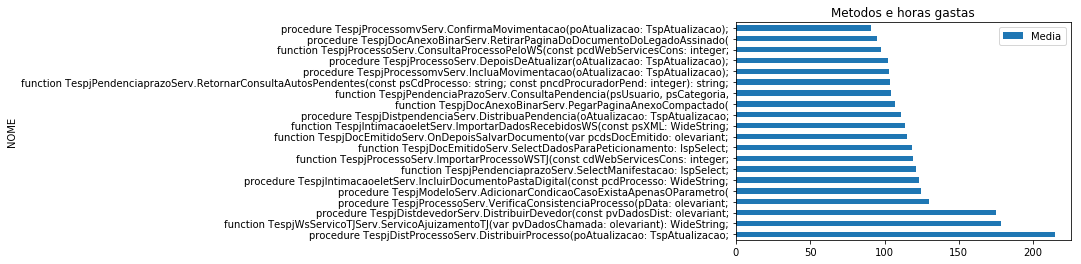

(10364, 6)


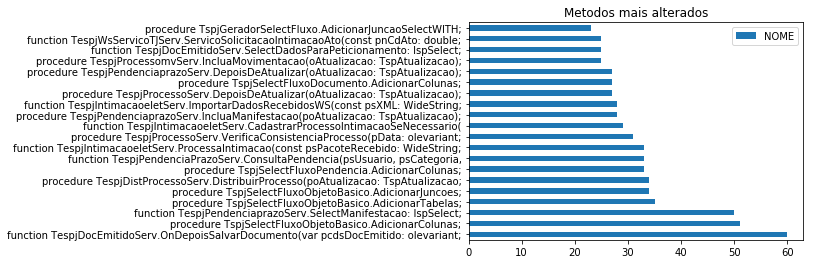

csv\Cliente.csv
(9531, 5)


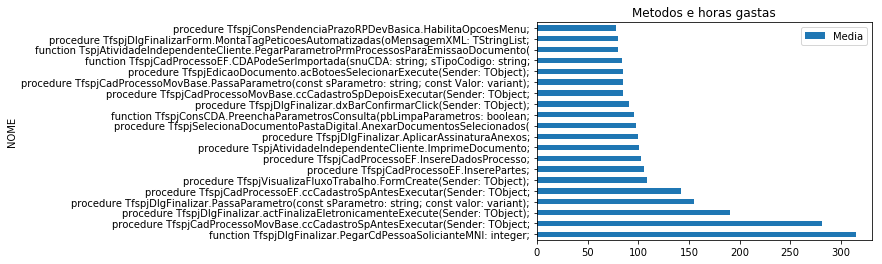

(9380, 6)


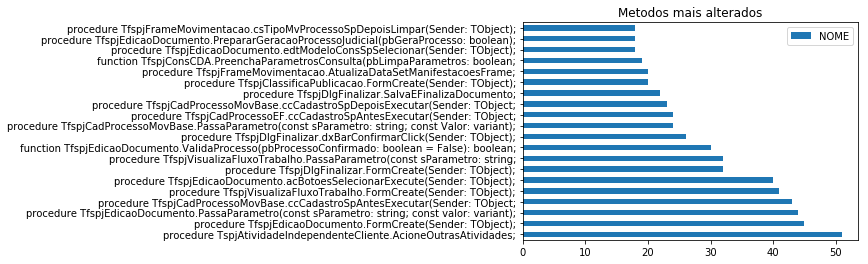

In [90]:
Alteracoes(True)